In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Nifty50.csv')

In [3]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index, format="%d-%m-%Y")

In [4]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-05-27', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09'],
              dtype='datetime64[ns]', name='Date', length=5582, freq=None)

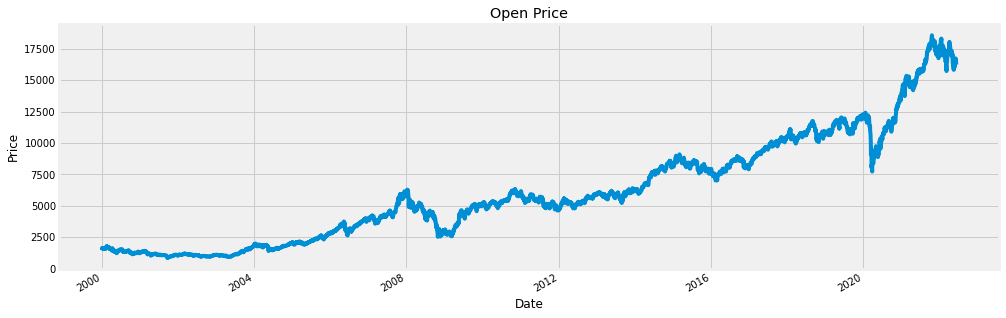

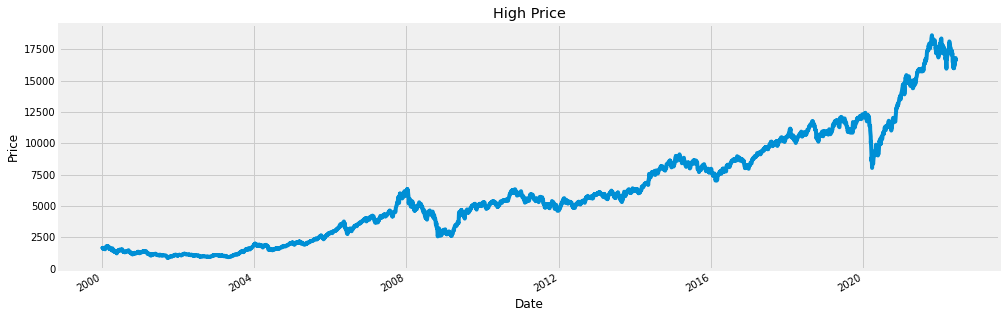

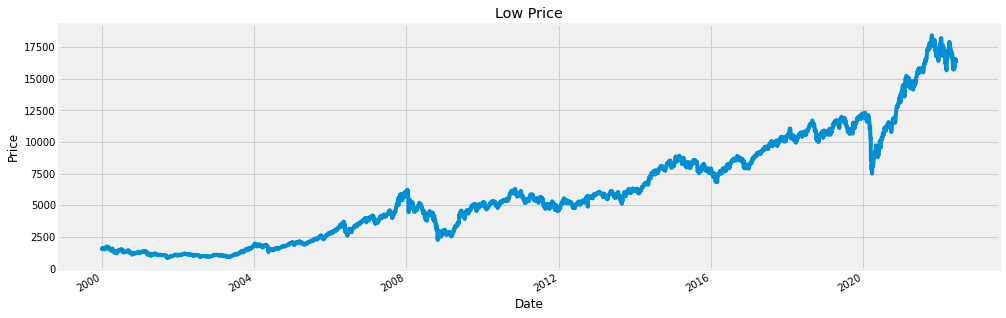

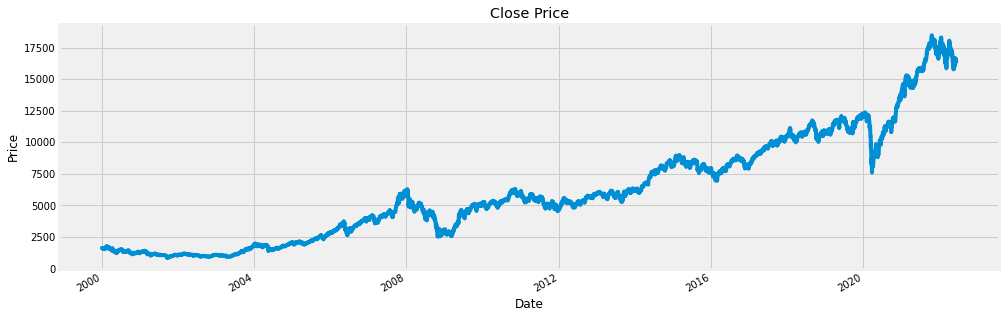

In [5]:
# Plot the 'Open' column
df['Open'].plot(figsize = (15,5))
plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the 'High' column
df['High'].plot(figsize = (15,5))
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the 'Low' column
df['Low'].plot(figsize = (15,5))
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the 'Close' column
df['Close'].plot(figsize = (15,5))
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
open = df[['Open']]
high = df[['High']]
low = df[['Low']]
close = df[['Close']]

In [7]:
open.head()

,Open
Date,
2000-01-03,1482.15
2000-01-04,1594.40
2000-01-05,1634.55
2000-01-06,1595.80
2000-01-07,1616.60


In [8]:
train = open
test = open.loc[open.index >= '01-Jan-21']

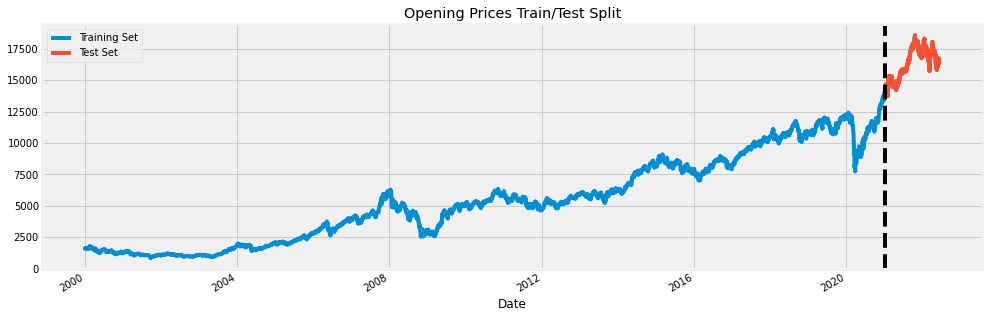

In [9]:
# Plot the open prices
fig, ax1 = plt.subplots(figsize=(15, 5))
train['Open'].plot(ax=ax1, label='Training Set', title='Opening Prices Train/Test Split')
test['Open'].plot(ax=ax1, label='Test Set')
ax1.axvline('01-Jan-2021', color='black', ls='--')
ax1.legend(['Training Set', 'Test Set'])
plt.show()

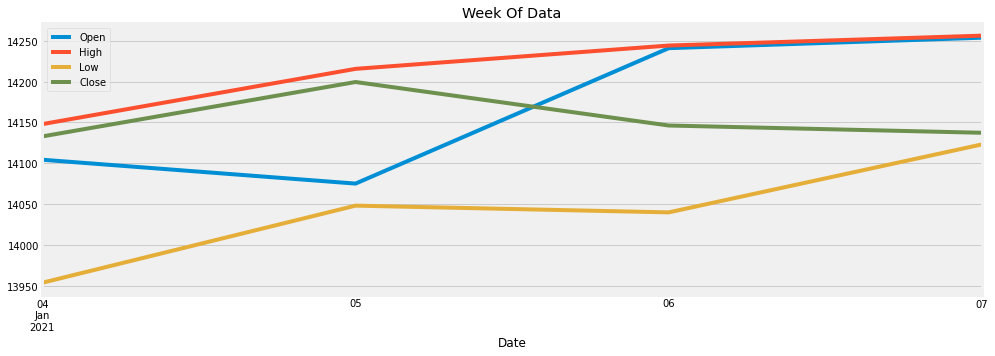

In [10]:
df.loc[(df.index > '01-01-2021') & (df.index < '01-08-2021')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [11]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

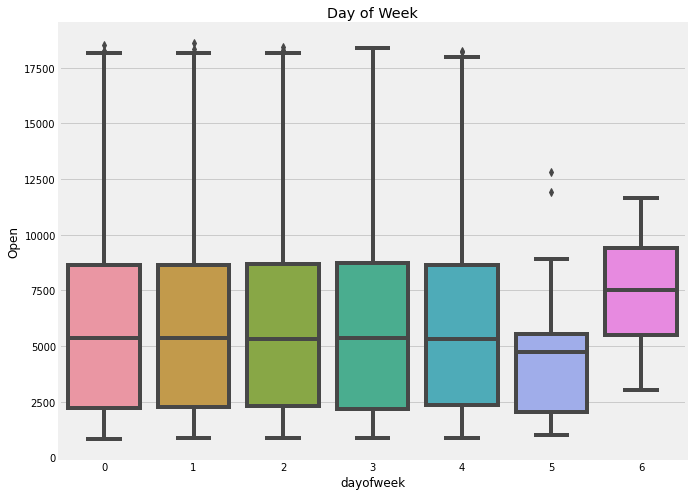

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Open')
ax.set_title('Day of Week')
plt.show()

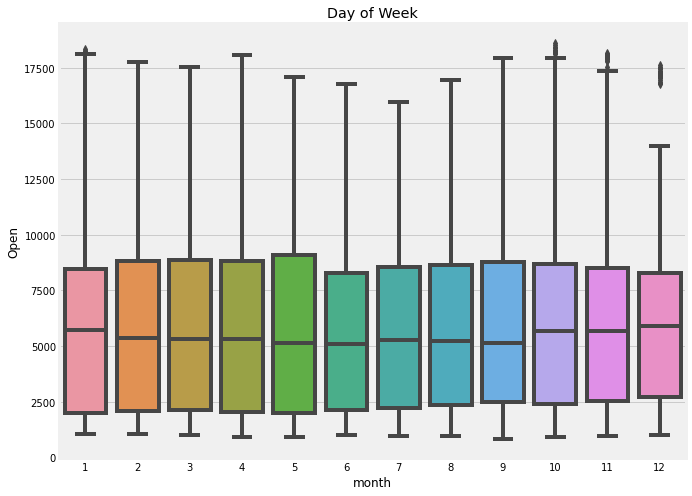

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Open')
ax.set_title('Day of Week')
plt.show()

In [14]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Open'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [15]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=50)

[10:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7372.65363	validation_1-rmse:16235.22203
[50]	validation_0-rmse:4499.92931	validation_1-rmse:9882.30058
[100]	validation_0-rmse:2773.50414	validation_1-rmse:6045.05856
[150]	validation_0-rmse:1749.01001	validation_1-rmse:3737.41889
[200]	validation_0-rmse:1154.09769	validation_1-rmse:2401.94205
[250]	validation_0-rmse:821.56160	validation_1-rmse:1604.78024
[300]	validation_0-rmse:649.37867	validation_1-rmse:1114.56530
[350]	validation_0-rmse:565.34255	validation_1-rmse:815.32449
[400]	validation_0-rmse:523.66943	validation_1-rmse:649.66233
[450]	validation_0-rmse:503.09866	validation_1-rmse:565.46167
[500]	validation_0-rmse:492.56649	validation_1-rmse:504.57280
[550]	validation_0-rmse:482.10469	validation_1-rmse:458.30012
[600]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

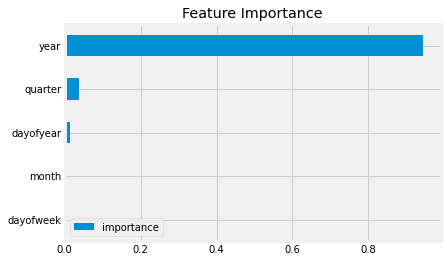

In [16]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

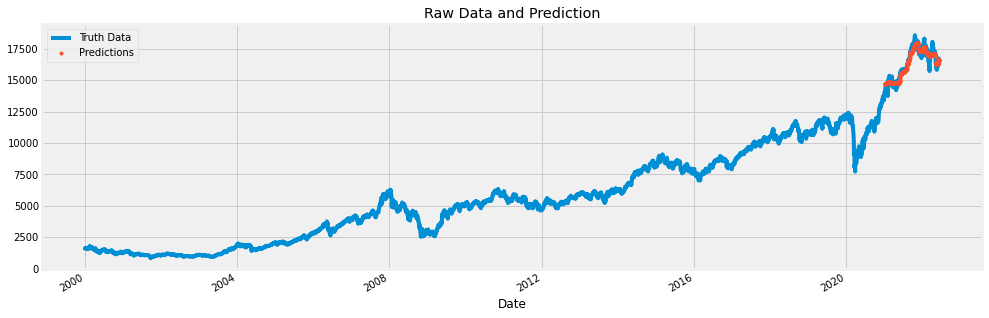

In [17]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Open']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [18]:
score = np.sqrt(mean_squared_error(test['Open'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 298.48


In [19]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2022-03-08    1180.078125
2022-03-07    1059.878125
2021-02-01    1005.020117
2022-04-05     987.430078
2021-01-28     953.220117
2022-03-09     849.828125
2021-01-29     817.020117
2022-04-06     749.580078
2021-01-01     746.895117
2022-04-04     715.930078
Name: error, dtype: float64